In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing


In [2]:
def load_files(path):
    loss = np.loadtxt(path+'training_loss.txt')
    # print(loss)
    # loss = loss/535
    # print('_'*10)
    # print(loss)
    loss = loss/([535]*len(loss))
    acc = np.loadtxt(path+'training_accuracy.txt')
    domain = np.loadtxt(path+'domain_labels.txt')[:-1]
    te_loss = np.loadtxt(path+'testing_loss.txt')
    te_loss = te_loss/([131]*len(te_loss))
    te_acc = np.loadtxt(path+'testing_accuracy.txt')
    machine = np.loadtxt(path+'machine_labels.txt', dtype = str)
    Z = np.load(path+'Z_space.npy')
    #args = np.loadtxt(path+'arguments.txt', dtype = str, delimiter = '\n')
    args =[]
    le =  preprocessing.LabelEncoder()
    le.fit(machine)
    machine_num = le.transform(machine)+[1]*len(machine) #beacuse predictions are from 1-4

    
    return loss, acc, te_loss, te_acc, domain, machine, machine_num, Z, args

In [3]:
ex = '2022-10-19 12:07:48.340494/'
ex = '2022-10-20 10:08:05.681469/'
ex = '2022-10-20 12:09:05.420792/'
ex = '2022-10-20 15:09:14.352312/'

In [4]:
loss, acc, te_loss, te_acc, domain, machine, machine_num, Z, args = load_files(ex)

In [5]:
import pandas as pd
scores = pd.read_csv('../HER2/truthfile_002.csv', names=['num', 'file name', 's1', 's2', 's3', 's4', 's5', 's6', 's_7']) 
img_locs = np.loadtxt(ex+'image_locs.txt', str)

true_label = []

for i in img_locs:
    true_label.append(int(i.split('/')[2][-4]))
    
true_machine = []
for i in img_locs:
    true_machine.append(i.split('/')[3][-6:-4])
    
    

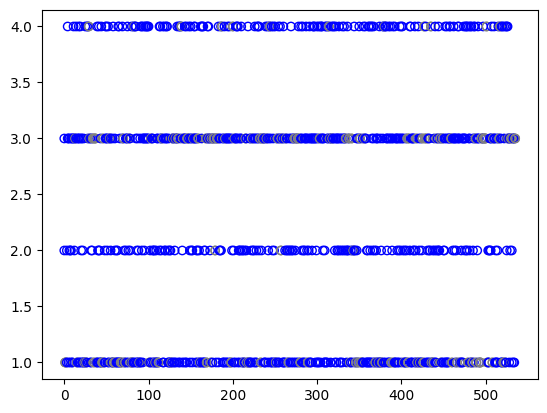

In [6]:
plt.figure()
x = np.arange(0, len(domain))
for i in range(len(domain)):
    if domain[i]==machine_num[i]:
        c = 'grey'
    else:
        c = 'blue'
    plt.scatter(x[i], domain[i],facecolors='none', edgecolors=c)
    plt.scatter(x[i],machine_num[i], facecolors='none', edgecolors=c)
plt.show()

In [7]:
domain

array([3., 1., 1., 1., 3., 1., 3., 1., 3., 1., 1., 3., 3., 3., 3., 1., 1.,
       3., 3., 1., 3., 1., 2., 3., 1., 1., 1., 1., 3., 4., 3., 1., 2., 3.,
       3., 1., 3., 3., 1., 4., 1., 4., 1., 1., 1., 1., 3., 1., 1., 3., 3.,
       3., 4., 1., 3., 3., 1., 3., 4., 1., 3., 1., 1., 1., 1., 1., 3., 1.,
       1., 3., 3., 1., 1., 2., 1., 3., 2., 3., 3., 1., 1., 1., 1., 4., 1.,
       3., 1., 1., 2., 1., 3., 1., 4., 3., 3., 2., 4., 3., 4., 3., 3., 1.,
       1., 3., 3., 3., 1., 1., 1., 1., 3., 3., 1., 2., 3., 3., 3., 1., 1.,
       4., 3., 3., 3., 1., 3., 2., 1., 1., 1., 3., 1., 1., 3., 1., 3., 3.,
       1., 1., 3., 4., 1., 3., 3., 3., 1., 1., 3., 3., 4., 2., 3., 3., 2.,
       3., 3., 3., 1., 3., 1., 3., 2., 1., 1., 3., 4., 1., 1., 1., 3., 1.,
       4., 4., 3., 3., 1., 3., 3., 3., 3., 2., 3., 3., 3., 4., 3., 3., 2.,
       4., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 1., 3., 4., 1., 3., 1.,
       3., 3., 1., 3., 1., 2., 3., 2., 1., 1., 2., 3., 3., 1., 1., 1., 3.,
       1., 1., 3., 3., 1.

In [10]:
#a = scores.loc[scores['file name'].str.contains('5578-2.tif')].mean(axis =1)
#df.loc[df['column_name'].isin(some_values)]
print(os.getcwd())
path = ex
print(path+'image_locs.txt')
img_locs = np.loadtxt(path+'image_locs.txt', str)

/home/didsr/Documents/DomId/notebooks
2022-10-20 15:09:14.352312/image_locs.txt


In [17]:
d1 =[]
d2 =[]
d3 =[]
d4 =[]
for i in range(len(domain)):

    if domain[i] == 1:
        d1.append(img_locs[i])
    if domain[i] == 2:
        d2.append(img_locs[i])
    if domain[i] == 3:
        d3.append(img_locs[i])
    if domain[i] == 4:
        d4.append(img_locs[i])
        


In [23]:
import cv2

In [107]:
# import matplotlib.image as mpimg
# img = mpimg.imread
def vizualize_images_per_domain(d, num):
    plt.figure(figsize = (25, 30))
    for j in range(10):
        img = cv2.imread('../'+d[j])
        plt.subplot(1, 10, j+1)
        plt.imshow(img)
        name = d[j].split('/')
        title = name[2][:-3]+' '+name[3][-6:-3]
        plt.title(title, fontsize =15)
        if j+1==1:
            plt.ylabel('Pred domain # '+str(num), fontsize =15)
    plt.show()
    
    

In [108]:
d1[1:5]

['HER2/combined_train/class1jpg/s06-2733-30431-32024FD.jpg',
 'HER2/combined_train/class2jpg/s06-9179-a-21098-6878H1.jpg',
 'HER2/combined_train/class2jpg/S04-6537-22267-7100H2.jpg',
 'HER2/combined_train/class2jpg/s06-2733-28079-27561H1.jpg']

In [109]:
d2[1:5]

['HER2/combined_train/class2jpg/9981-9947,10020FD.jpg',
 'HER2/combined_train/class1jpg/9981-5013,5325H2.jpg',
 'HER2/combined_train/class2jpg/S04-6537-22267-7100FD.jpg',
 'HER2/combined_train/class2jpg/9981-9613,9562FD.jpg']

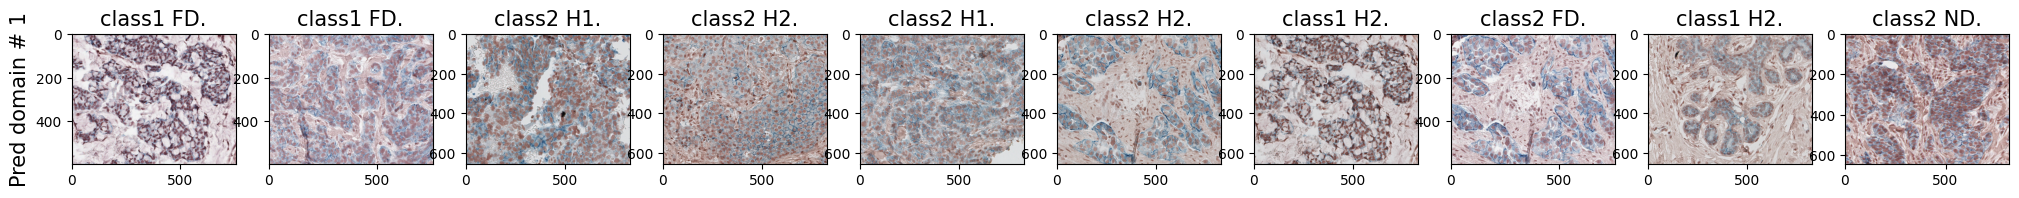

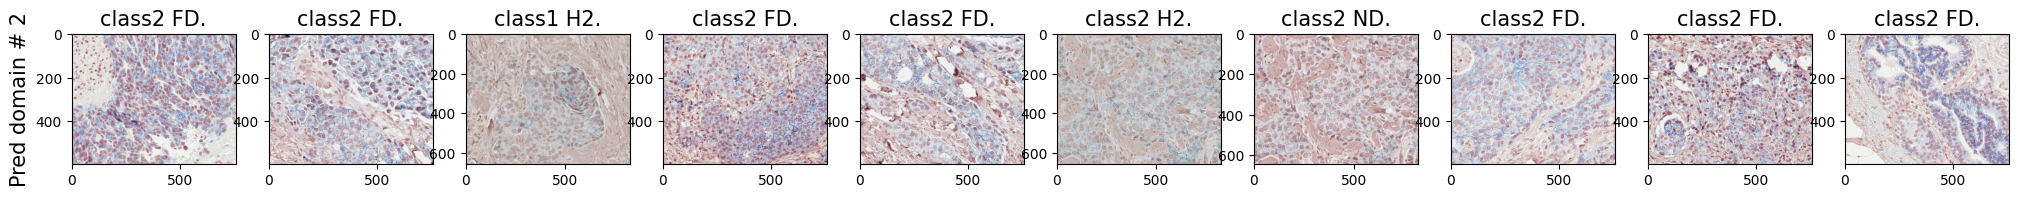

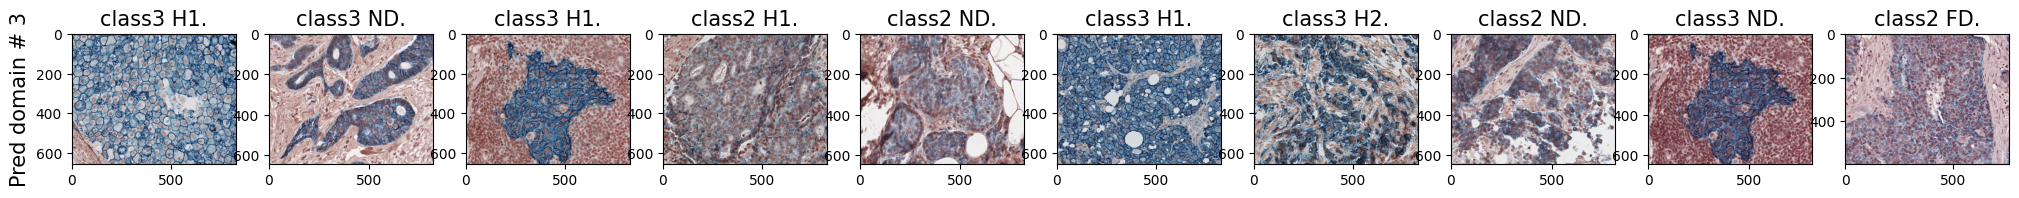

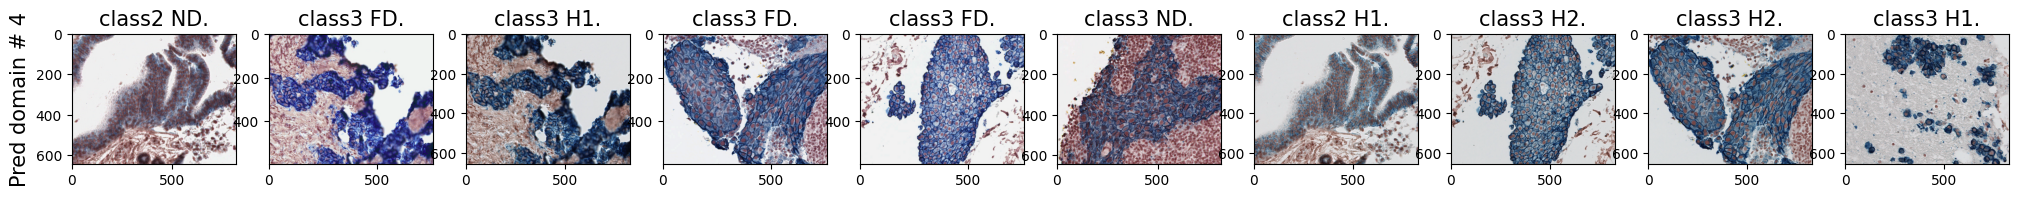

In [110]:
vizualize_images_per_domain(d1, 1)
vizualize_images_per_domain(d2, 2)
vizualize_images_per_domain(d3, 3)
vizualize_images_per_domain(d4, 4)


In [144]:
dic_machine = {'FD': 1, 'H1': 2, 'H2': 3, 'ND': 4}
color_dic = {1:'salmon', 2:'plum', 3: 'lightblue', 4: 'gold'}

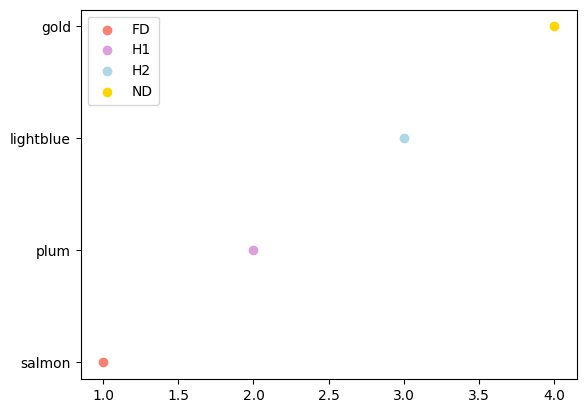

In [163]:
plt.figure()
for i in range(1, 5):
    plt.scatter(i, color_dic[i], color = color_dic[i])
plt.legend(['FD', 'H1', 'H2', 'ND'])



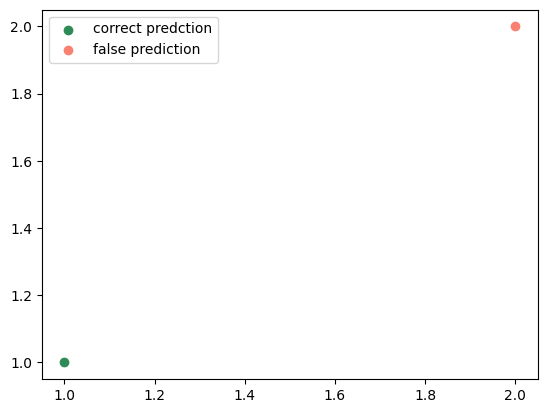

In [167]:
plt.figure()
for i in range(1, 3):
    if i<2:
        c = 'seagreen'
    else:
        c = 'salmon'
    plt.scatter(i, i, color = c)
plt.legend(['correct predction', 'false prediction'])


In [131]:
import random
from random import random
random()

0.10312380072854122

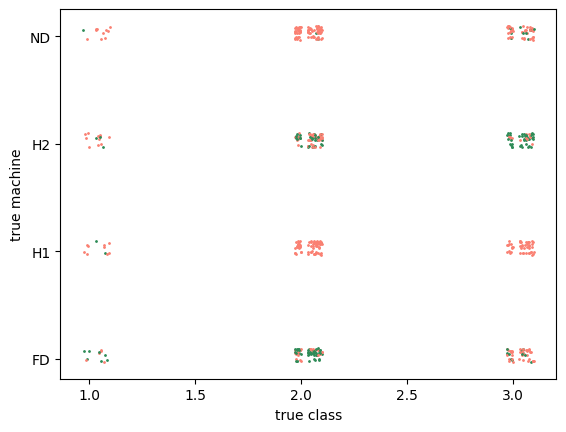

In [165]:
plt.figure()
counter =0
sign =1
for i in img_locs:
    true_class = int(i.split('/')[2][-4])
    true_machine = i.split('/')[3][-6:-4]
    true_machine_num = dic_machine[true_machine]
    n = random()/10
    m = random()/10
    if n<0.03:
        n=(-1)*n
    if m<0.03:
        m = (-1)*m
    if domain[counter]==true_machine_num:
        c = 'seagreen'
    else:
        c = 'salmon'
    #plt.scatter(true_class+n, true_machine_num+m, color = color_dic[domain[counter]], s =1)
    plt.scatter(true_class+n, true_machine_num+m, color = c, s =1)
    counter+=1
plt.xlabel('true class')
plt.ylabel('true machine')
plt.yticks([1, 2, 3, 4],['FD', 'H1', 'H2', 'ND'])
plt.show()
    
    
    

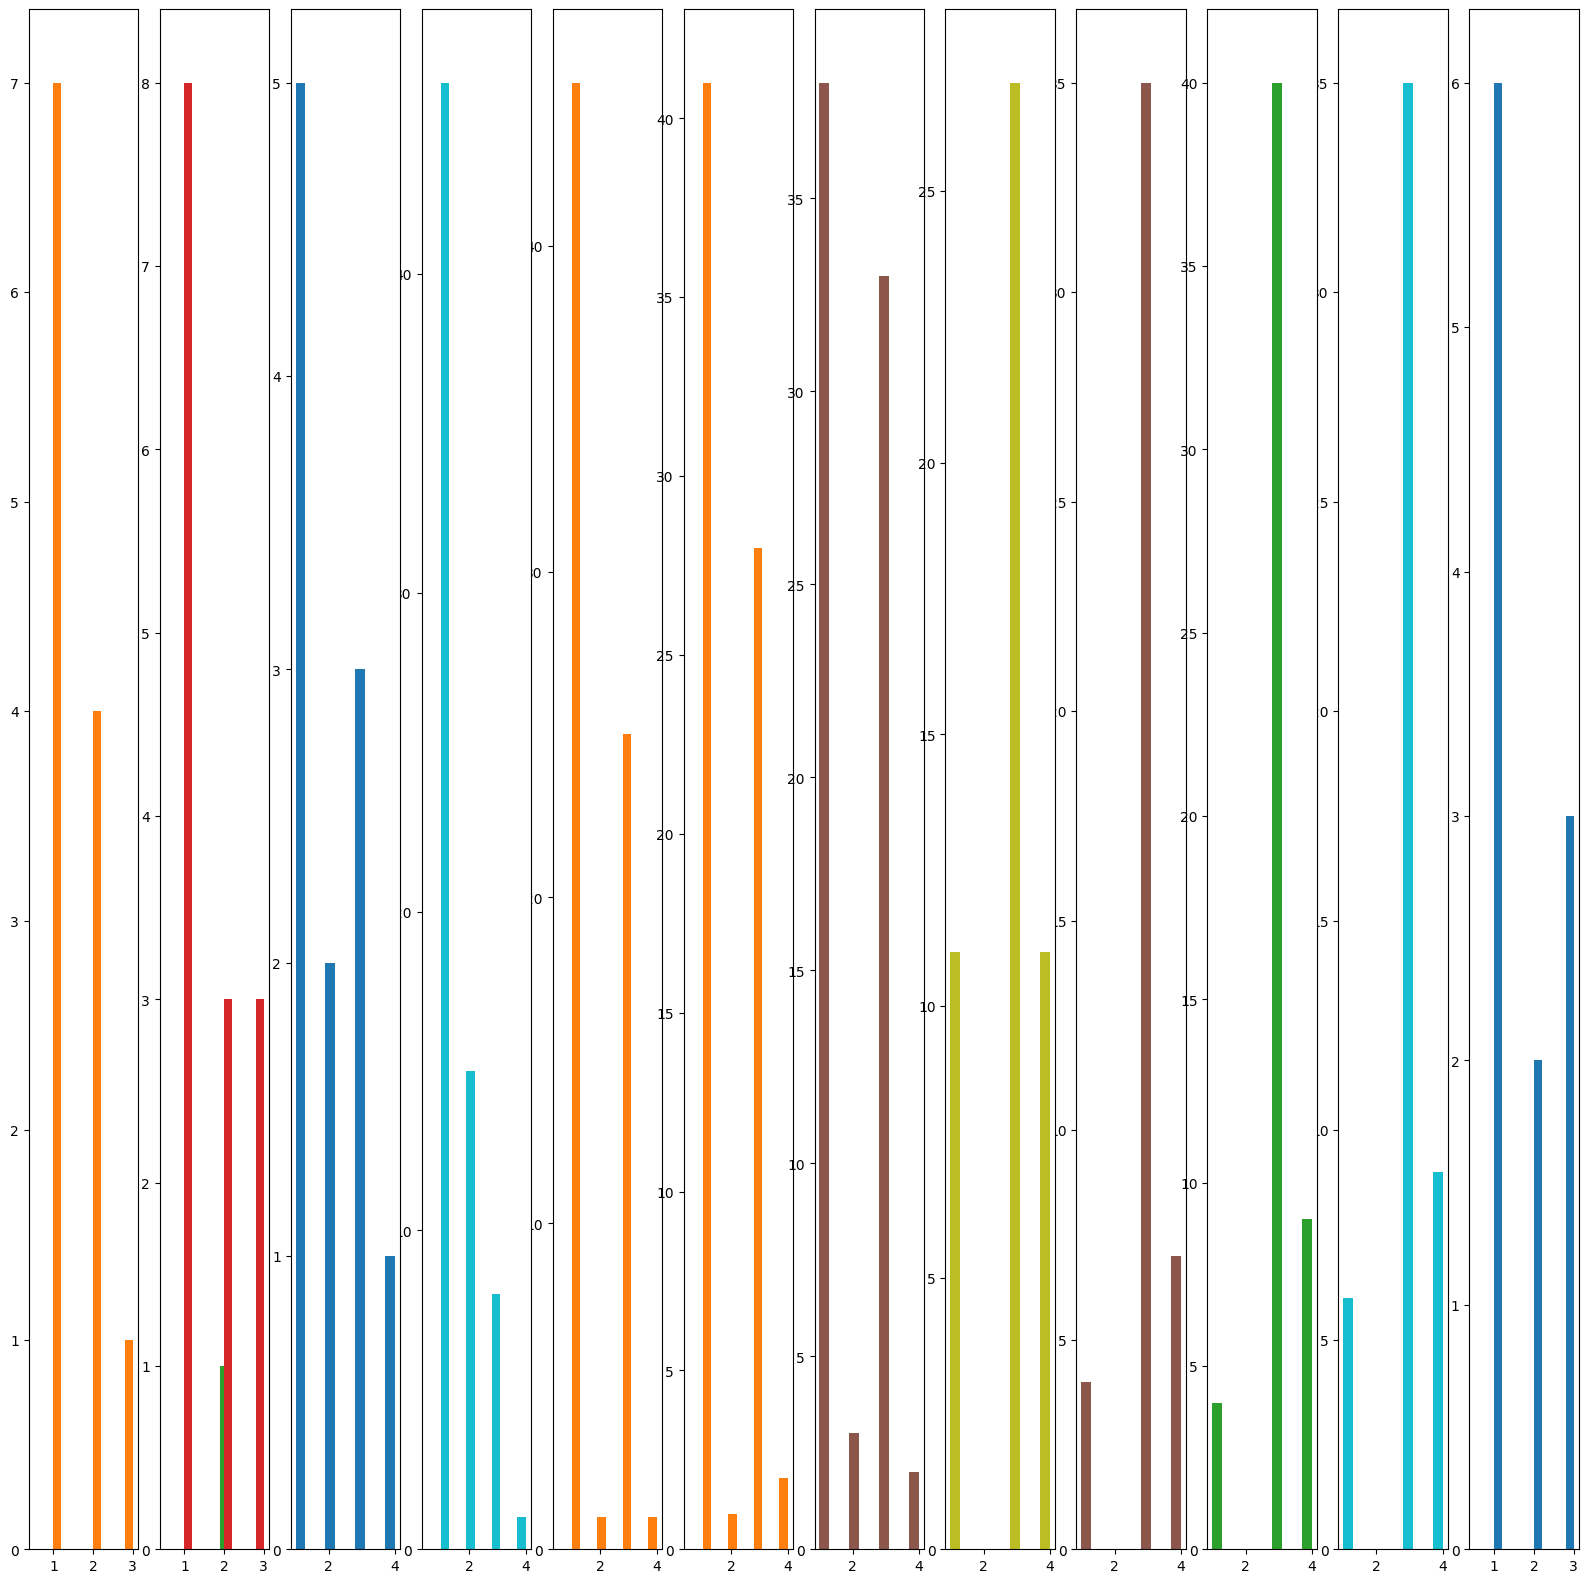

In [148]:
plt.figure(figsize = (20, 20))
h1, h2, h3, h4, h5, h6, h7,h8, h9, h10, h11, h12 = [], [], [], [], [],[],[],[],[],[],[], []
for i in range(len(img_locs)):
    true_class = int(img_locs[i].split('/')[2][-4])
    true_machine = img_locs[i].split('/')[3][-6:-4]
    true_machine_num = dic_machine[true_machine]
    if true_class==1 and true_machine_num==1:
        h1.append(domain[i])
        plt.subplot(1, 12, 1)
        plt.hist(h1)
        
    if true_class==1 and true_machine_num==2:
        h12.append(domain[i])
        plt.subplot(1, 12, 12)
        plt.hist(h12)
    if true_class==1 and true_machine_num==3:
        h2.append(domain[i])
        plt.subplot(1, 12, 2)
        plt.hist(h2)
    if true_class==1 and true_machine_num==4:
        h3.append(domain[i])
        plt.subplot(1, 12, 3)
        plt.hist(h3)
    if true_class==2 and true_machine_num==1:
        h4.append(domain[i])
        plt.subplot(1, 12, 4)
        plt.hist(h4)
    if true_class==2 and true_machine_num==2:
        h5.append(domain[i])
        plt.subplot(1, 12, 5)
        plt.hist(h5)
    if true_class==2 and true_machine_num==3:
        h6.append(domain[i])
        plt.subplot(1, 12, 6)
        plt.hist(h6)
    if true_class==2 and true_machine_num==4:
        h7.append(domain[i])
        plt.subplot(1, 12, 7)
        plt.hist(h7)
    if true_class==3 and true_machine_num==1:
        h8.append(domain[i])
        plt.subplot(1, 12, 8)
        plt.hist(h8)
    if true_class==3 and true_machine_num==2:
        h9.append(domain[i])
        plt.subplot(1, 12, 9)
        plt.hist(h9)
    if true_class==3 and true_machine_num==3:
        h10.append(domain[i])
        plt.subplot(1, 12, 10)
        plt.hist(h10)
    if true_class==3 and true_machine_num==4:
        h11.append(domain[i])
        plt.subplot(1, 12, 11)
        plt.hist(h11)
        
        
plt.show()    

In [115]:
dictionary['FD']

1

In [113]:
machine
dic = {4: 'ND', 2: 'H1', 3: 'H2', 1: 'FD'}

[[63 55 52 52]
 [22  3  4  5]
 [35 65 73 70]
 [11  7  9 10]]


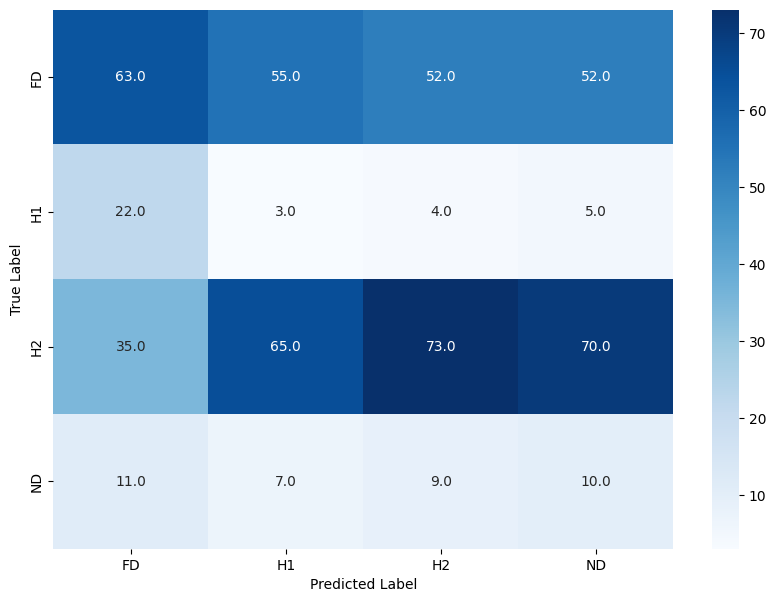

In [201]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(domain, machine_num)
print(cm) #row is true, col pre

plt.figure(figsize = (10,7))
sn.heatmap(cm, cmap="Blues", annot=True,fmt=".1f")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5, 2.5, 3.5],['FD', 'H1', 'H2', 'ND'])
plt.yticks([0.5, 1.5, 2.5, 3.5],['FD', 'H1', 'H2', 'ND'])
plt.show()

In [202]:
from sklearn.metrics import accuracy_score
accuracy_score(domain,machine_num)

0.27798507462686567

In [137]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
# cm = cm[:, [2,0,1,3]]
row_ind, col_ind = linear_sum_assignment(-cm)
        # Note that row_ind will be equal to [0, 1, ..., cost.shape[0]] because cost is a square matrix.
conf_mat = cm[:, col_ind]

In [138]:
row_ind

array([0, 1, 2, 3])

(array([131.,   0.,   0., 130.,   0.,   0., 139.,   0.,   0., 136.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

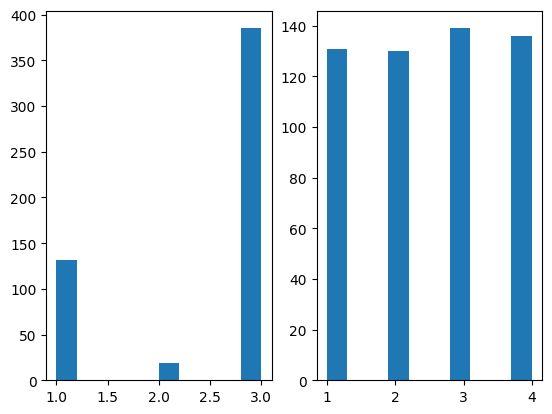

In [107]:
plt.subplot(1,2,1)
plt.hist(pred_machine)
plt.subplot(1,2,2)
plt.hist(machine_num)

<AxesSubplot:>

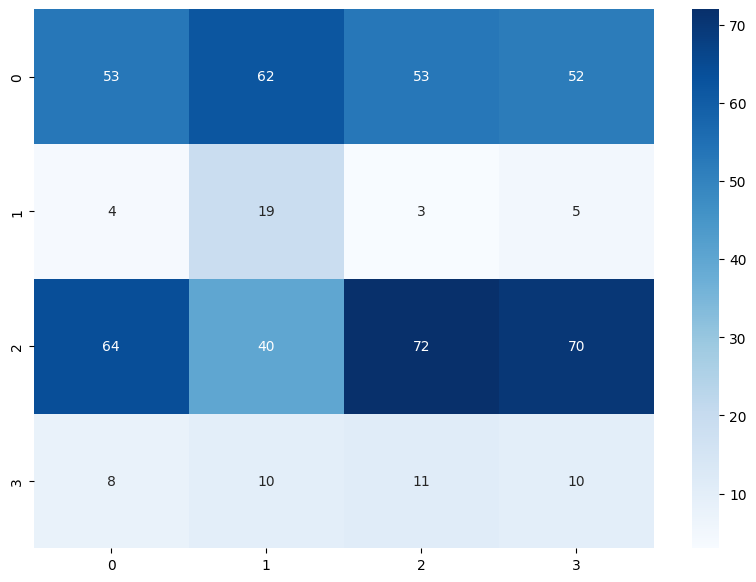

In [139]:
plt.figure(figsize = (10,7))
sn.heatmap(conf_mat, cmap="Blues", annot=True)

In [20]:
machine_num.shape

(537,)

In [32]:
(34+64+14+55)/536

0.31156716417910446

In [56]:
def domain_per_machine(domain, machine, experiment_name):
    plt.figure(figsize = (15,5))
    machine_num = np.unique(machine)
    domain_names = [1, 2, 3]
    counter=0
    c = 0
    print(len(domain_names), machine_num)
    for i in machine_num:

        d1 = 0
        d2 =0
        d3 =0


        for j in range(len(domain)):
            #print(i, j, domain[j], machine[j])
            if domain[j]==domain_names[0] and machine[j]==i:
                d1+=1
            if domain[j]== domain_names[1] and machine[j]==i:
                d2+=1
            try:
                if domain[j]==domain_names[2] and machine[j]==i:
                    d3+=1
            except:
                c+=1
        print([d1, d2, d3])
        plt.subplot(1,4,counter+1)    
        plt.bar([0, 2, 4], [d1, d2, d3])
        plt.xticks([0, 2, 4], ['D1', 'D2', 'D3'])
        plt.title(experiment_name+' Machine # ' +str(i))
        plt.ylim(0, 200)
        counter+=1


    plt.show() 

3 [1. 2. 3. 4.]
[9, 36, 1]
[33, 183, 27]
[2, 6, 43]
[4, 65, 127]


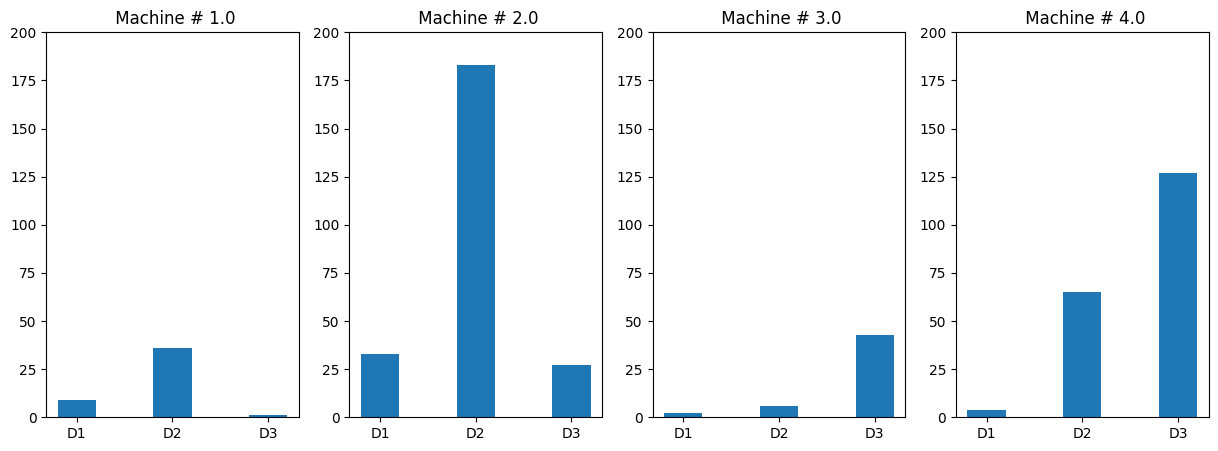

In [57]:
domain_per_machine(true_label, pred_machine, '')

In [66]:
conf_mat

array([[34,  4,  3,  5],
       [50, 64, 65, 64],
       [14, 11, 14, 12],
       [33, 51, 57, 55]])

[34 50 14 33]
[ 4 64 11 51]
[ 3 65 14 57]
[ 5 64 12 55]


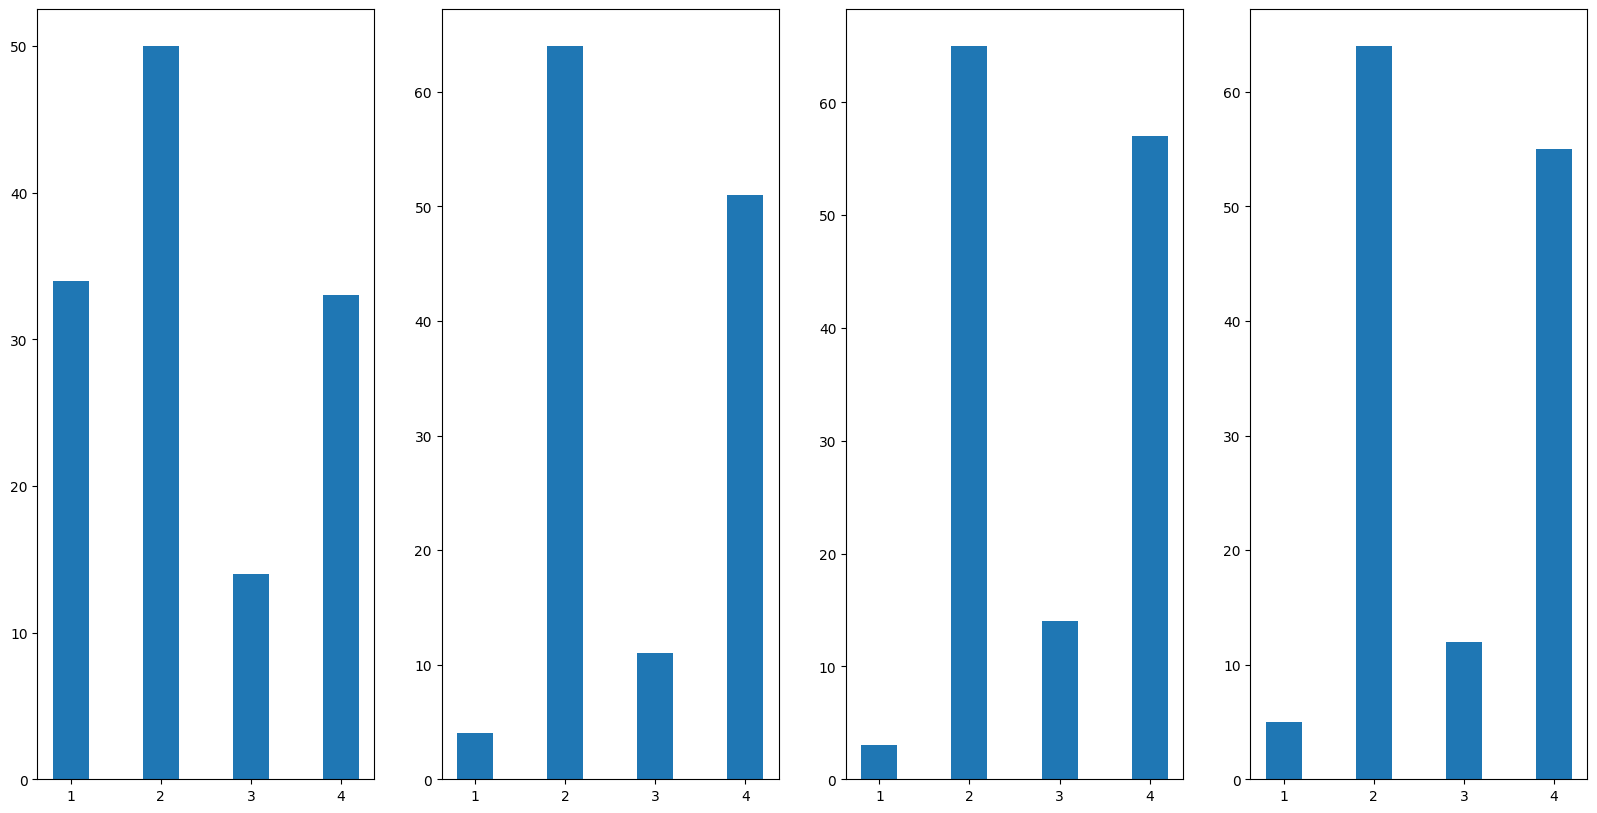

In [79]:
plt.figure(figsize = (20, 10))
for i in range(len(conf_mat)):
    plt.subplot(1, 4, i+1)
    print(conf_mat[:, i])
    plt.bar([2, 4, 6, 8], conf_mat[:, i])
    plt.xticks([2, 4, 6, 8], ['1', '2', '3', '4'])